In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [36]:
from IPython.display import display, Markdown
def display_df(df):
    display(Markdown(df.to_markdown()))

In [255]:
model = pickle.load(open('pickles/recomendaciones_compras_500_clusters.pickle', 'rb')) #To load saved model from local directory

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [246]:
infochamigo = pd.read_excel('infochamigo.xlsx')
infochamigo['ventaid'] = infochamigo['ventaid'].dropna()
infochamigo['maestroid'] = infochamigo['maestroid'].dropna()

In [38]:
compras_table = pd.read_csv('compras_table.csv', index_col='ventaid')
compras_table.head()

,CERVEZAS10,CERVEZAS100,CERVEZAS101,CERVEZAS102,CERVEZAS103,CERVEZAS104,CERVEZAS105,CERVEZAS11,CERVEZAS110,CERVEZAS111,...,GRAL9788,GRAL98,GRAL9803,GRAL9818,GRAL9847,GRAL9849,GRAL9852,GRAL99,GRAL990,GRAL9973
ventaid,,,,,,,,,,,,,,,,,,,,,
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Predict the cluster labels: labels
labels = model.predict(compras_table)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'ventaid': compras_table.index})

# Display df sorted by cluster label
display_df(df.sort_values('labels', ascending=False).head(10))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


|       |   labels |   ventaid |
|------:|---------:|----------:|
| 12550 |      499 |     41391 |
| 14989 |      498 |     48371 |
| 15324 |      498 |     49542 |
| 17784 |      498 |     57292 |
| 15073 |      498 |     48670 |
| 18105 |      498 |     58023 |
| 12331 |      498 |     40532 |
| 14968 |      498 |     48311 |
| 18287 |      497 |     58418 |
| 15536 |      497 |     50189 |

## Conteo de los cluster (grupo de recomendaciones) mas frequentes

In [254]:
display_df(df.groupby('labels').size().sort_values(ascending=False).head(10))

|   labels |    0 |
|---------:|-----:|
|        0 | 3299 |
|        5 |  863 |
|       10 |  837 |
|       20 |  513 |
|        6 |  488 |

## Veamos cual es el combo mas comprado

In [270]:
ventaids = df[df['labels'] == 0]['ventaid']
recomendaciones = compras_table[compras_table.index.isin(ventaids)]
items = recomendaciones.melt(var_name='items')
items = items[items['value'] > 0]
recomendaciones_counts = items['items'].value_counts(ascending=False)
display_df(recomendaciones_counts.head(10))

|           |   items |
|:----------|--------:|
| GRAL6044  |      21 |
| GRAL12172 |      21 |
| GRAL145   |      21 |
| GRAL464   |      20 |
| GRAL636   |      18 |
| GRAL28    |      17 |
| GRAL4133  |      16 |
| GRAL5953  |      15 |
| GRAL6941  |      14 |
| GRAL7549  |      14 |

## Visualizemos las agrupaciones de productos con un Histograma

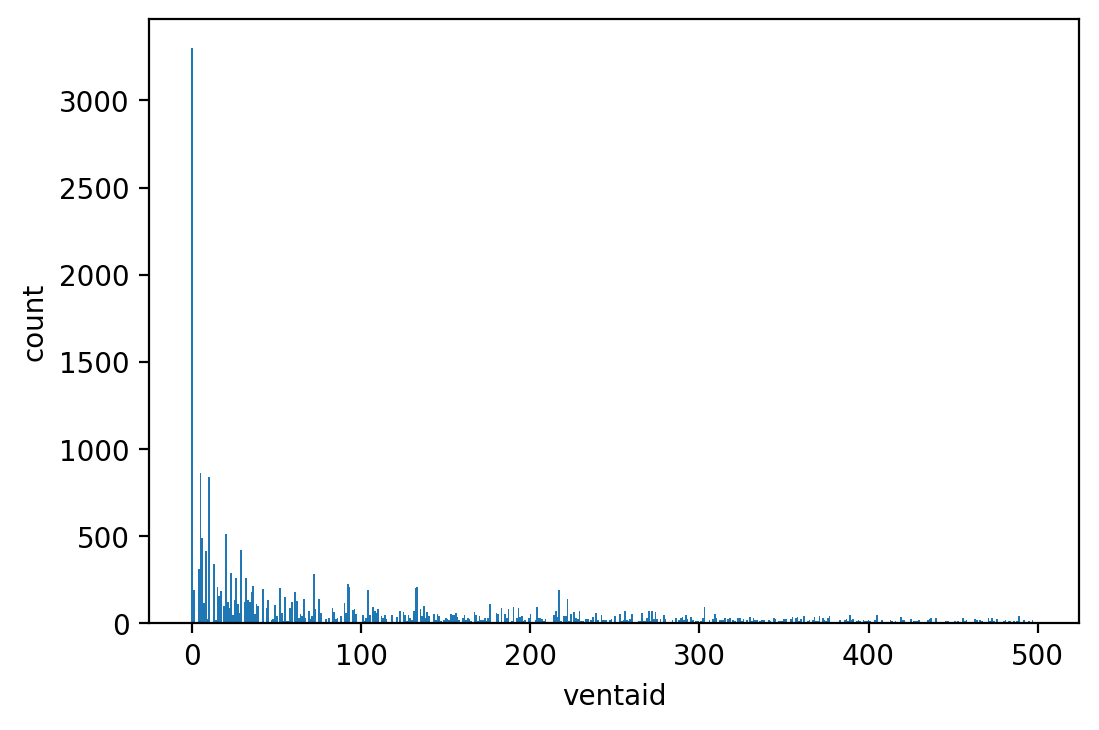

In [42]:
plt.rcParams["figure.dpi"] = 200
bins = np.arange(0, df.labels.max() + 1.5) - 0.5
plt.hist(df.labels, bins)
plt.xlabel('ventaid')
plt.ylabel('count')
plt.show()

### Creamos un dataframe con todos los items disponibles

In [202]:
items = compras_table.columns.values
items_series = compras_table.columns
items_df = pd.DataFrame({'items': items})
display_df(items_df.head())

|    | items       |
|---:|:------------|
|  0 | CERVEZAS10  |
|  1 | CERVEZAS100 |
|  2 | CERVEZAS101 |
|  3 | CERVEZAS102 |
|  4 | CERVEZAS103 |

## Realizamos el lookup del 'item_busqueda' y visualizamos las recomendaciones

In [220]:
item_busqueda = 'GRAL479'
input_row = np.array([items_series == item_busqueda])
input_df = pd.DataFrame(data=input_row, columns=items)
display(input_df)
label = model.predict(input_df)[0]

,CERVEZAS10,CERVEZAS100,CERVEZAS101,CERVEZAS102,CERVEZAS103,CERVEZAS104,CERVEZAS105,CERVEZAS11,CERVEZAS110,CERVEZAS111,...,GRAL9788,GRAL98,GRAL9803,GRAL9818,GRAL9847,GRAL9849,GRAL9852,GRAL99,GRAL990,GRAL9973
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [261]:
ventaids = df[df['labels'] == label]['ventaid']
recomendaciones = compras_table[compras_table.index.isin(ventaids)]
items = recomendaciones.melt(var_name='items')
items = items[items['value'] > 0]
recomendaciones_counts = items['items'].value_counts(ascending=False)
len(recomendaciones_counts)

46

In [262]:
display_df(recomendaciones_counts)

|              |   items |
|:-------------|--------:|
| GRAL479      |      47 |
| GRAL3731     |      10 |
| GRAL10844    |       2 |
| GRAL117      |       2 |
| GRAL500      |       1 |
| GRAL501      |       1 |
| GRAL529      |       1 |
| GRAL533      |       1 |
| GRAL5965     |       1 |
| GRAL6013     |       1 |
| GRAL6026     |       1 |
| GRAL6072     |       1 |
| GRAL6079     |       1 |
| CERVEZAS102  |       1 |
| GRAL6344     |       1 |
| GRAL497      |       1 |
| GRAL6722     |       1 |
| GRAL73       |       1 |
| GRAL76       |       1 |
| GRAL8185     |       1 |
| GRAL8208     |       1 |
| GRAL8685     |       1 |
| GRAL8707     |       1 |
| GRAL9075     |       1 |
| GRAL6694     |       1 |
| GRAL478      |       1 |
| CERVEZAS156  |       1 |
| GRAL4724     |       1 |
| CERVEZAS192  |       1 |
| CERVEZAS22   |       1 |
| CERVEZAS231  |       1 |
| CERVEZAS8427 |       1 |
| GRAL10216    |       1 |
| GRAL11171    |       1 |
| GRAL12220    |       1 |
| GRAL126      |       1 |
| GRAL1477     |       1 |
| GRAL3703     |       1 |
| GRAL4439     |       1 |
| GRAL445      |       1 |
| GRAL4561     |       1 |
| GRAL457      |       1 |
| GRAL4583     |       1 |
| GRAL4621     |       1 |
| GRAL472      |       1 |
| GRAL9565     |       1 |

## GRAL479 -> FANTA NARANJA
## GRAL3731 -> UVITA
## GRAL10844 -> 
## GRAL117 -> PALERMO
